<a href="https://colab.research.google.com/github/Abdulmoiz-mk/Python-EDA-Projects/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [ ]:
# Place the Google Drive Sharing link
file_share_link = "https://drive.google.com/file/d/1vF7VpiQ754KpoKHgWBNl6cDi_OUyR-RX/view?usp=sharing"

# extract the ID of the file
file_id = file_share_link[file_share_link.find("d/")+2 : file_share_link.find("/v")]
print(file_id)
!gdown "$file_id" # Download the data from Google Drive

1vF7VpiQ754KpoKHgWBNl6cDi_OUyR-RX
Downloading...
From: https://drive.google.com/uc?id=1vF7VpiQ754KpoKHgWBNl6cDi_OUyR-RX
To: /content/titanic.csv
100% 60.3k/60.3k [00:00<00:00, 56.9MB/s]


In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

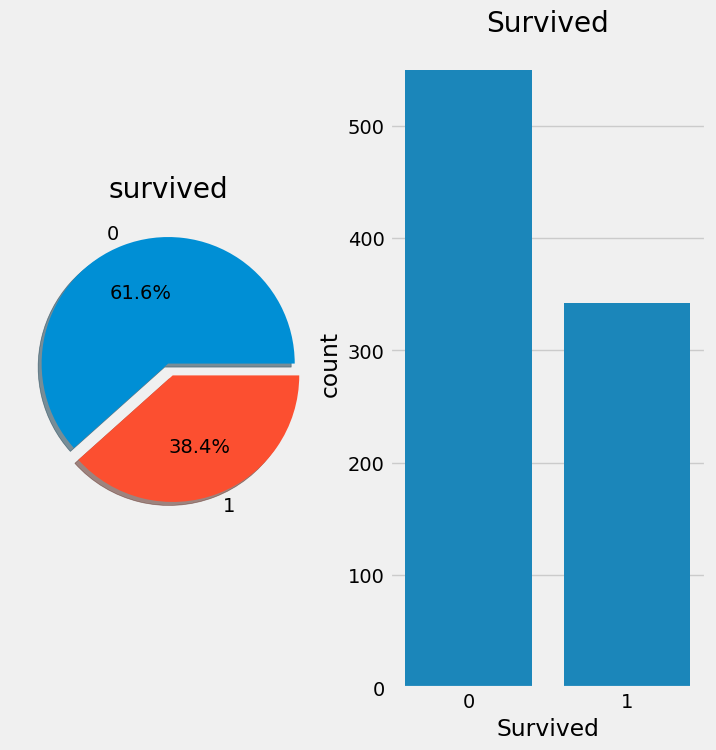

In [ ]:
f, ax = plt.subplots(1,2,figsize=(8,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct = "%1.1f%%",ax=ax[0], shadow = True)
ax[0].set_title("survived")
ax[0].set_ylabel("")
sns.countplot(x="Survived", data=df, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Sex

In [ ]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

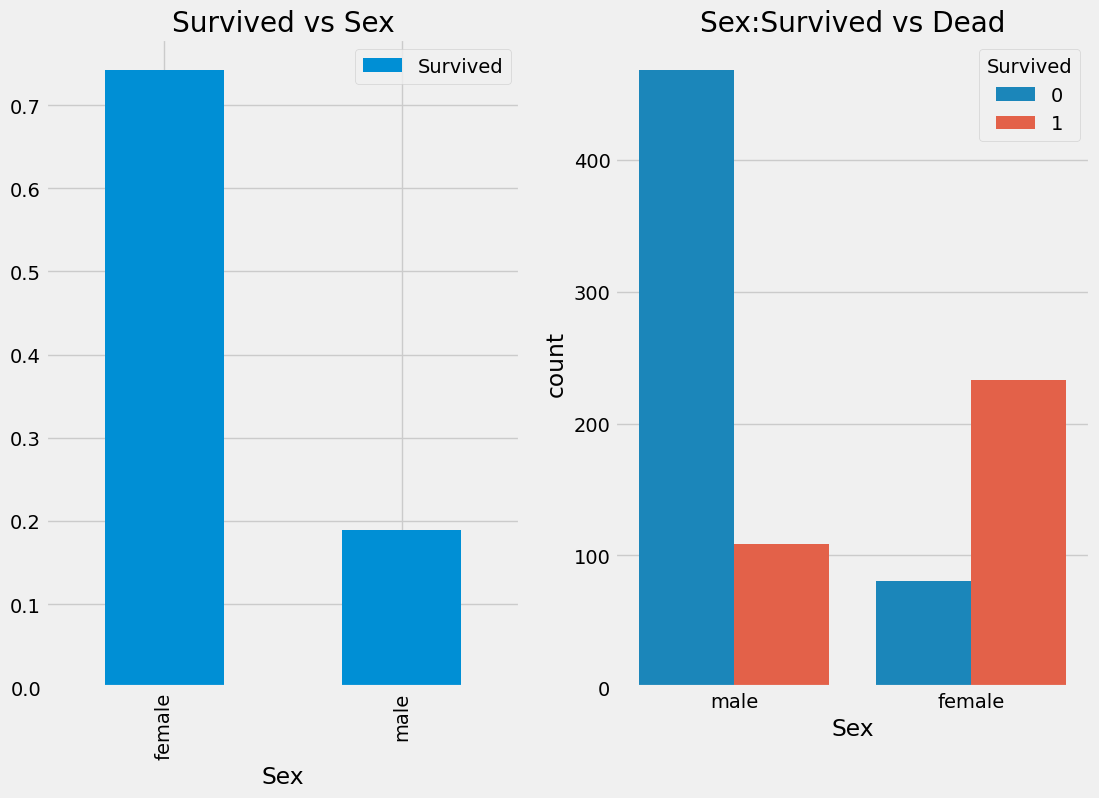

In [ ]:
f, ax=plt.subplots(1,2, figsize=(12,8))
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

P Class

In [ ]:
pd.crosstab( df['Pclass'],df['Survived'], margins=True, )

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


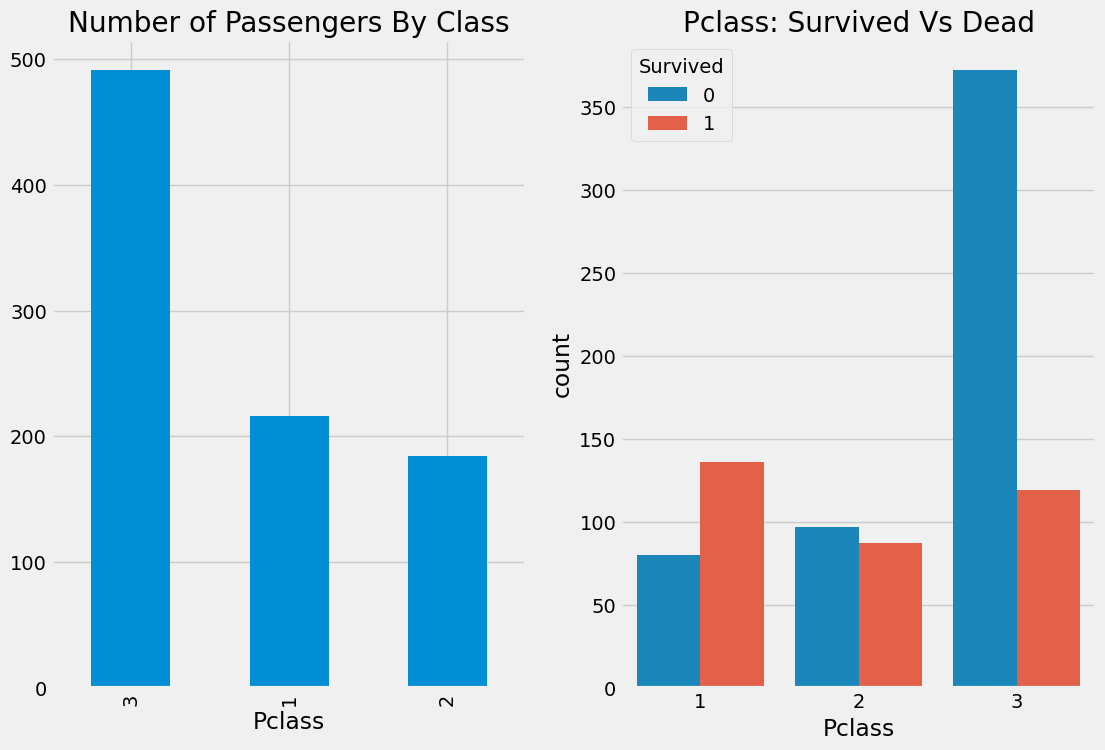

In [ ]:
f, ax=plt.subplots(1,2, figsize=(12,8))
df['Pclass'].value_counts().plot.bar(ax = ax[0])
ax[0].set_title('Number of Passengers By Class')
sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Pclass: Survived Vs Dead')
plt.show()

In [ ]:
pd.crosstab([df['Sex'],df['Survived']], df['Pclass'], margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

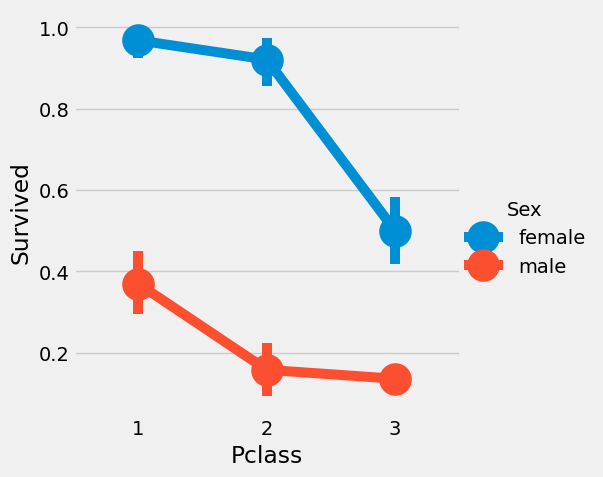

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='point')

Age

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Age'].min(),df['Age'].max(),df['Age'].mean()

(0.42, 80.0, 29.69911764705882)

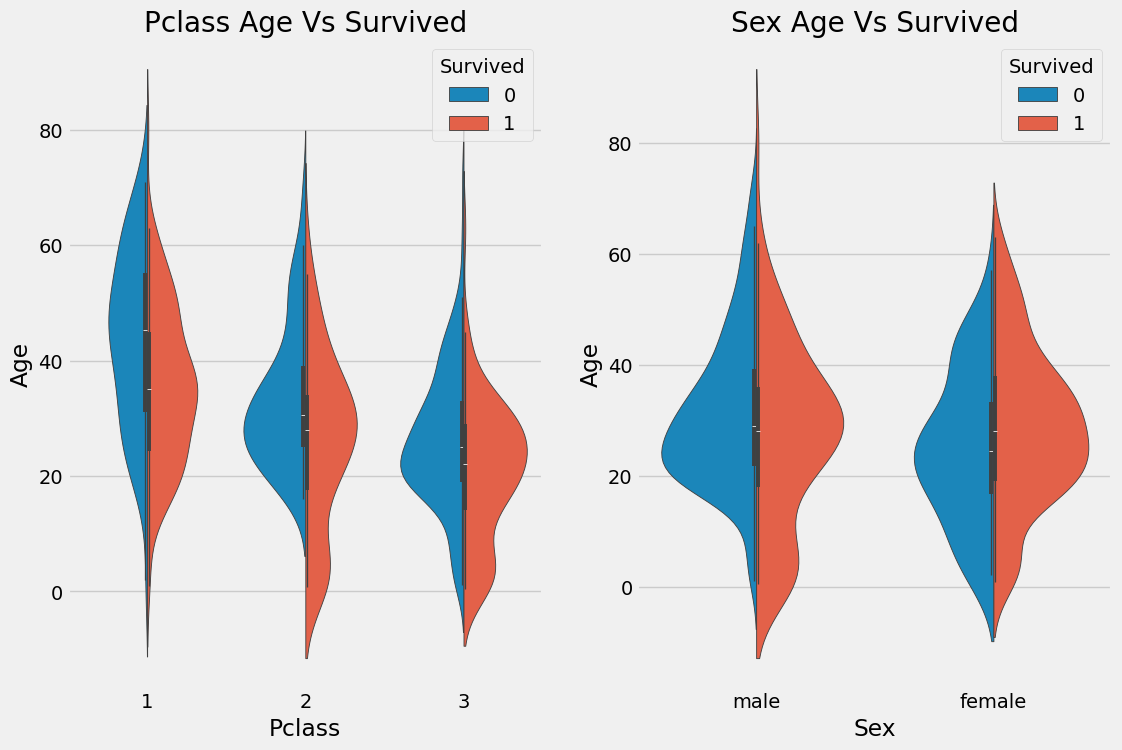

In [ ]:
f, ax=plt.subplots(1,2, figsize=(12,8))
sns.violinplot(x='Pclass',y='Age', hue = 'Survived', data=df, split=True, ax=ax[0])
ax[0].set_title('Pclass Age Vs Survived')
sns.violinplot(x='Sex',y='Age', hue = 'Survived', data=df, split=True, ax=ax[1])
ax[1].set_title('Sex Age Vs Survived')
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

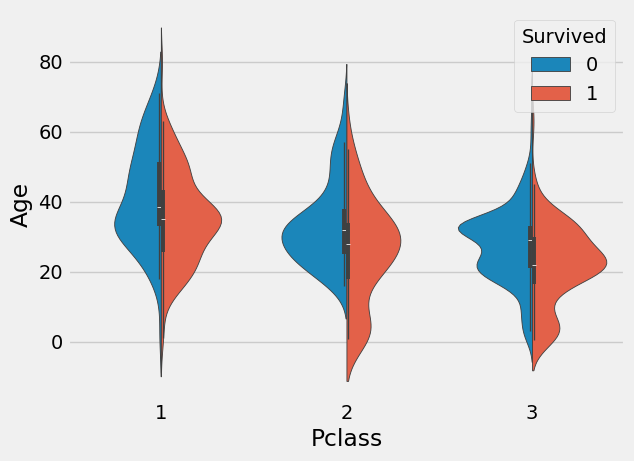

In [ ]:
sns.violinplot(x='Pclass',y='Age', hue = 'Survived', data=df, split=True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Initial'] = 0
for i in df:
 df['Initial'] = df['Name'].str.extract('([A-Za-z]+)\.')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
pd.crosstab(df['Initial'], df['Sex'])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
pd.crosstab(df['Initial'], df['Sex'])

Sex,female,male
Initial,,
Master,0,40
Miss,186,0
Mr,1,528
Mrs,127,0
Other,0,9


In [ ]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Fill NA Ages

In [ ]:
df.loc[(df['Age'].isnull()) & (df['Initial']=='Mr'), 'Age'] = 33
df.loc[(df['Age'].isnull()) & (df['Initial']=='Mrs'), 'Age'] = 36
df.loc[(df['Age'].isnull()) & (df['Initial']=='Miss'), 'Age'] = 22
df.loc[(df['Age'].isnull()) & (df['Initial']=='Master'), 'Age'] = 5
df.loc[(df['Age'].isnull()) & (df['Initial']=='Mr'), 'Other'] = 46

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN


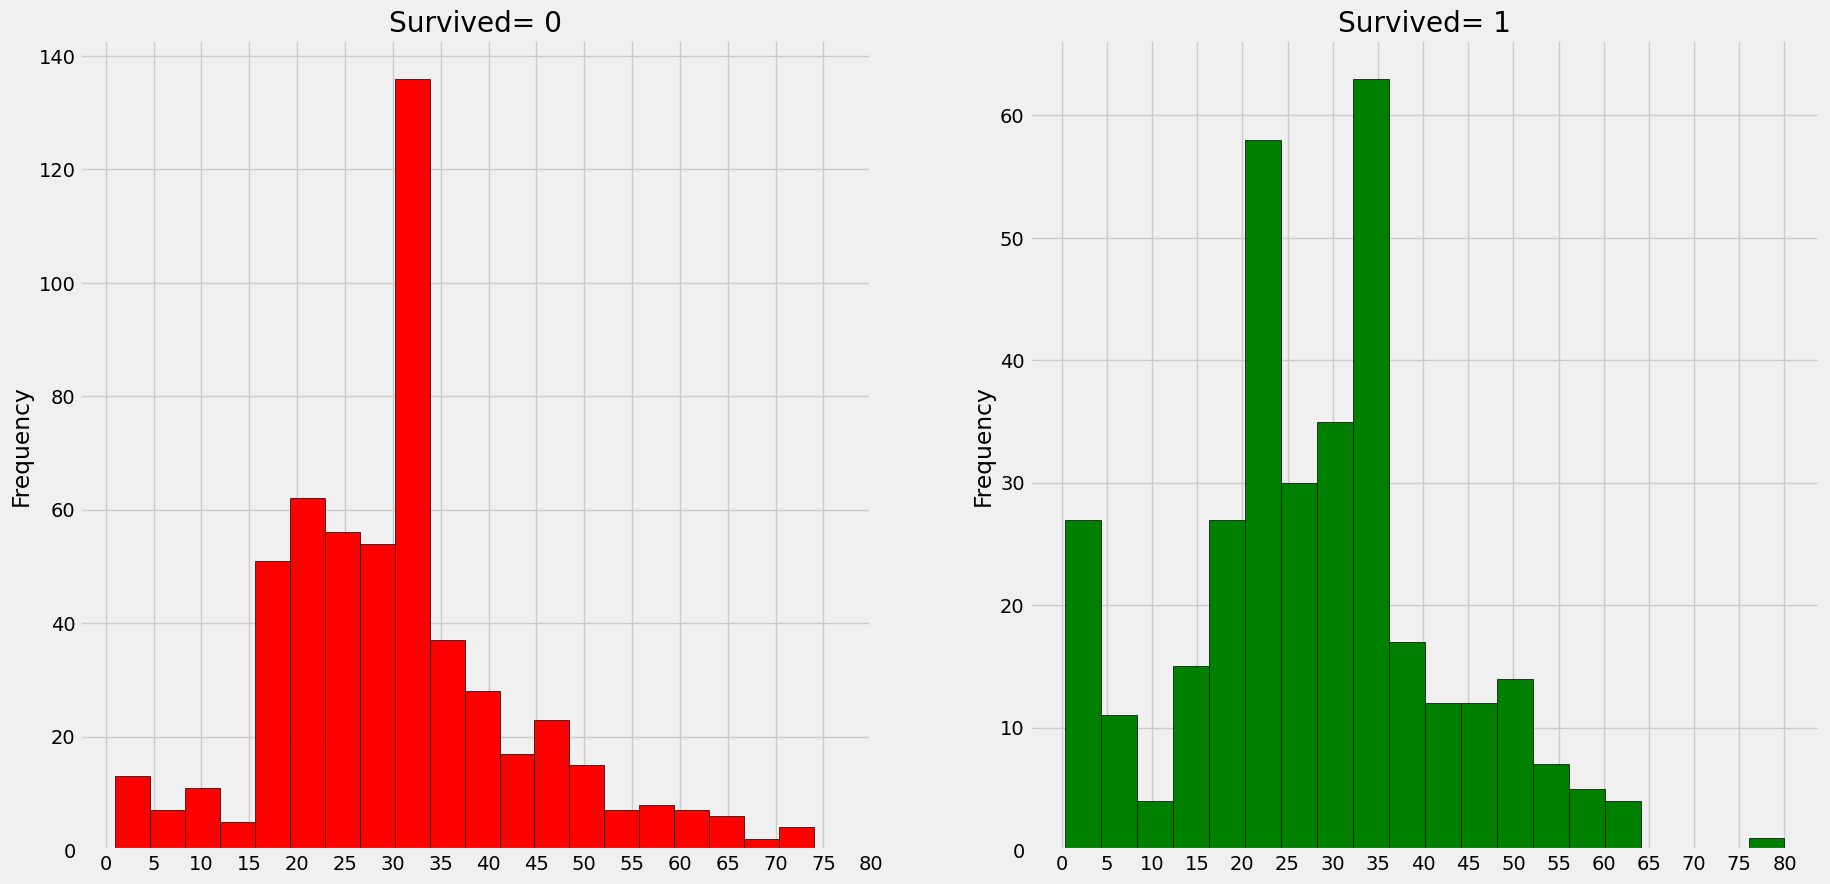

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

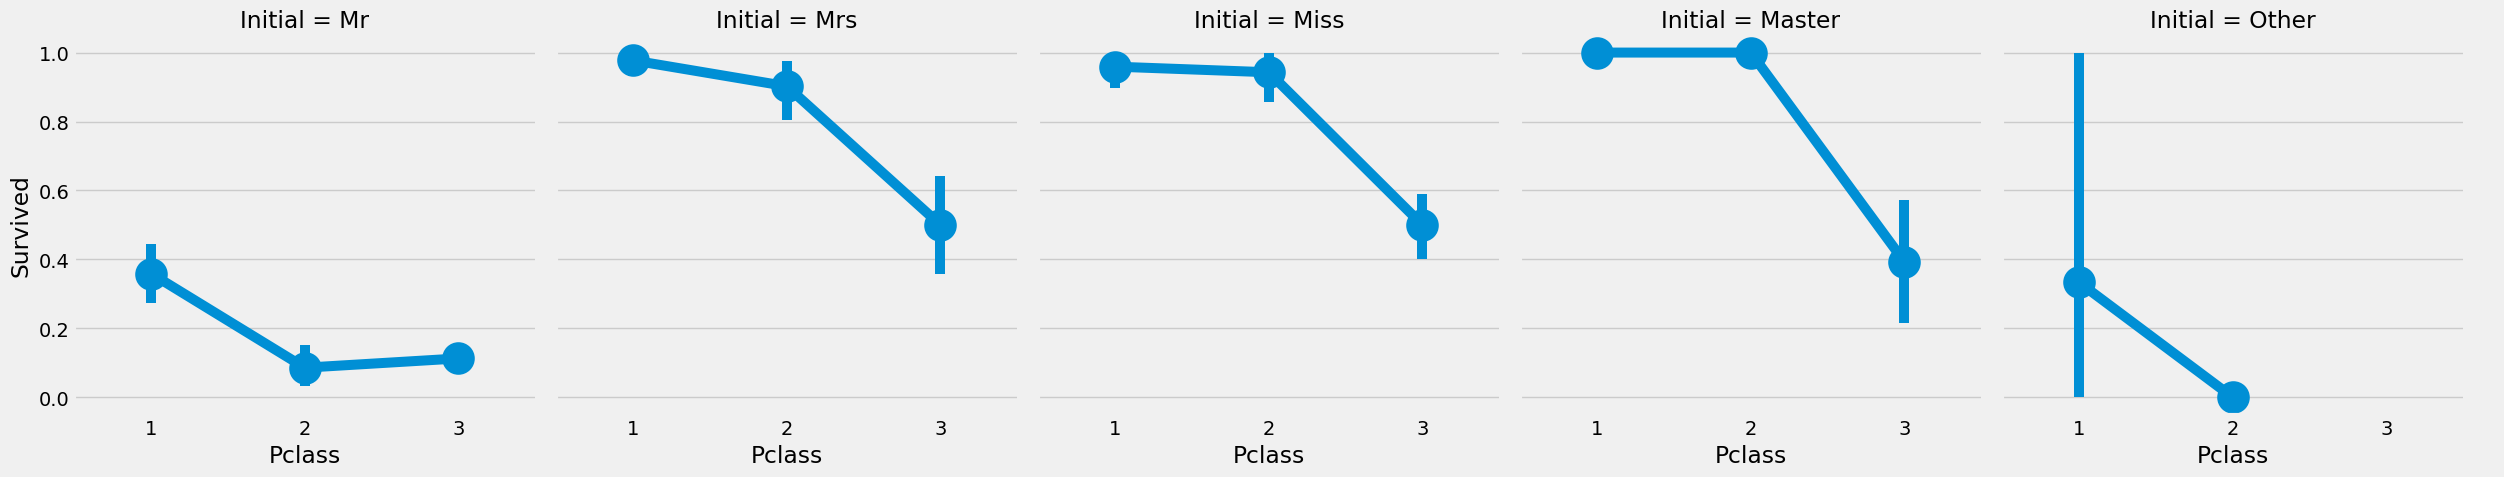

In [ ]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=df, kind='point')

Embarked - Nominal data

In [ ]:
pd.crosstab([df['Embarked'],df['Pclass']], [df['Sex'],df['Survived']], margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

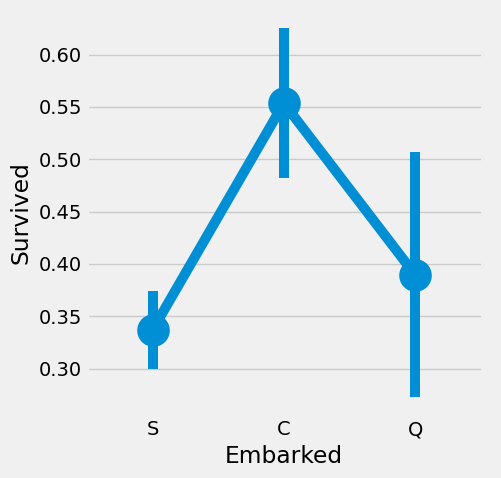

In [ ]:
sns.catplot(x='Embarked', y='Survived', data=df, kind='point')


<Axes: xlabel='Embarked', ylabel='count'>

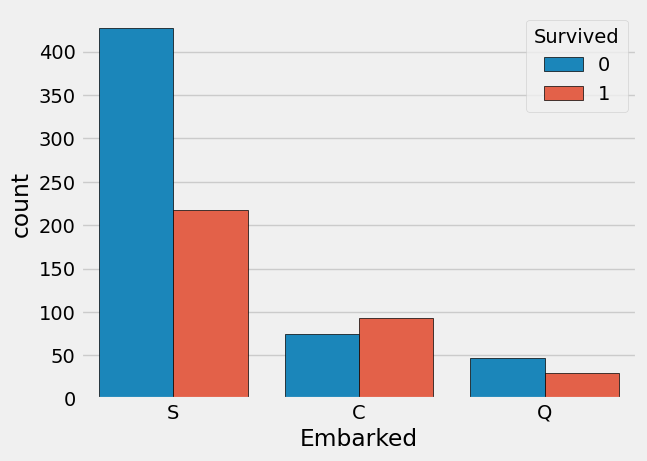

In [ ]:
sns.countplot(x='Embarked', data=df, hue='Survived',edgecolor='black')

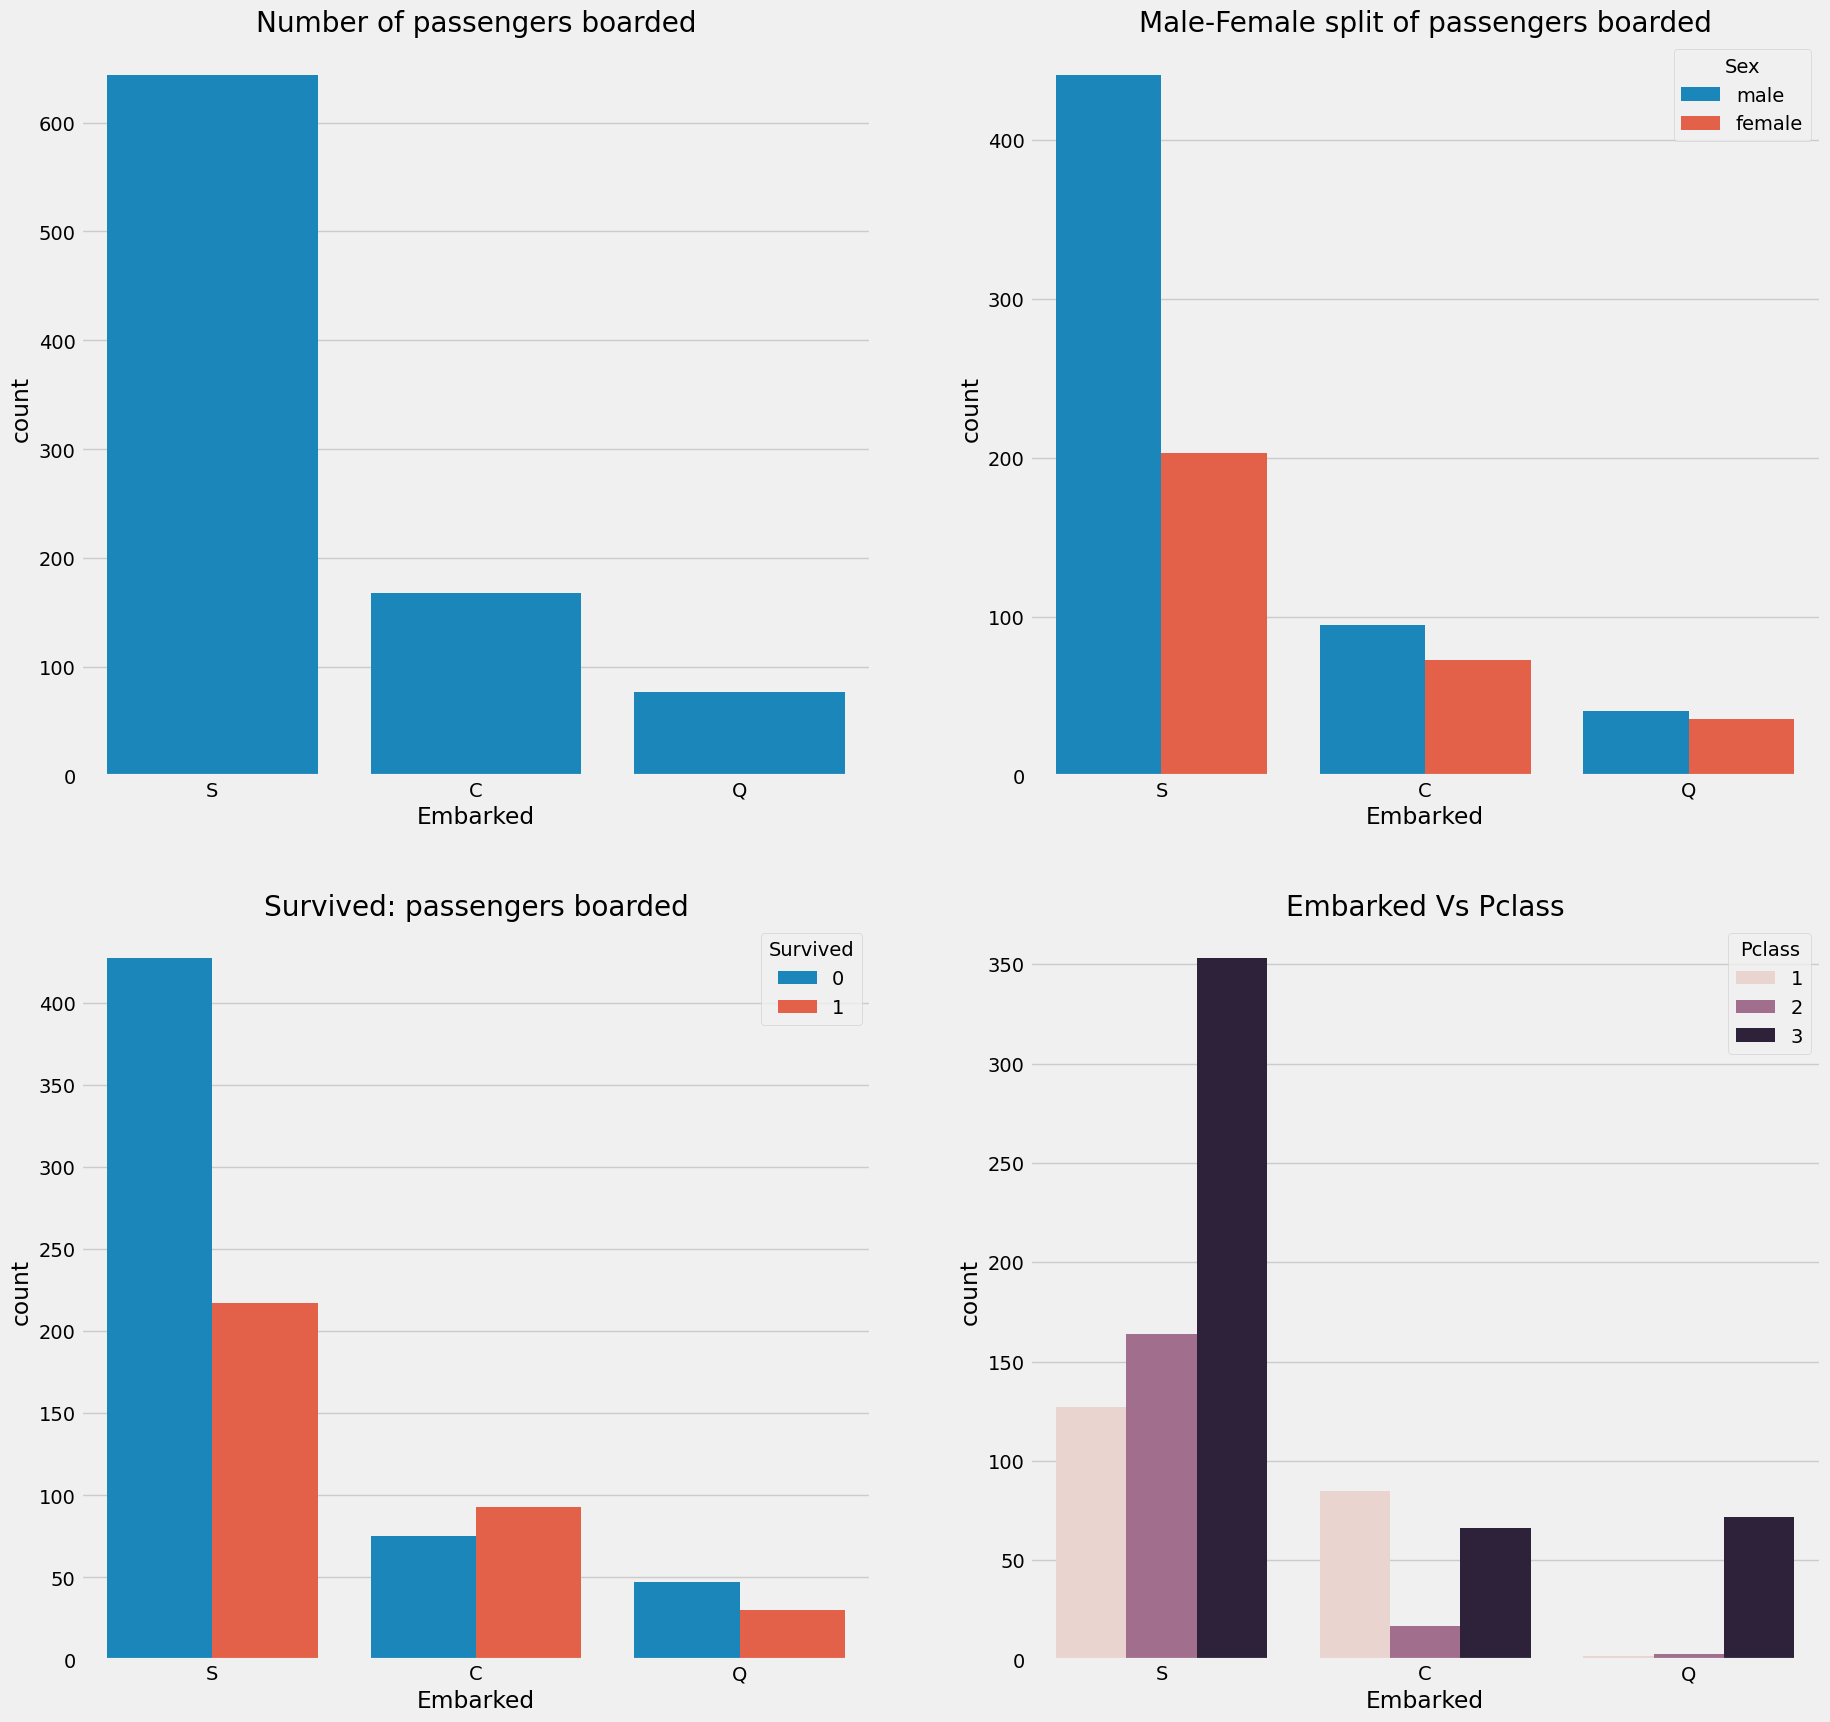

In [ ]:
f, ax = plt.subplots(2,2,figsize=(20,20))
sns.countplot(x="Embarked",data=df,ax=ax[0,0])
ax[0,0].set_title("Number of passengers boarded")

sns.countplot(x="Embarked",hue='Sex', data=df,ax=ax[0,1])
ax[0,1].set_title("Male-Female split of passengers boarded")

sns.countplot(x="Embarked",hue='Survived', data=df,ax=ax[1,0])
ax[1,0].set_title("Survived: passengers boarded")

sns.countplot(x="Embarked",hue='Pclass', data=df,ax=ax[1,1])
ax[1,1].set_title("Embarked Vs Pclass")

plt.show()

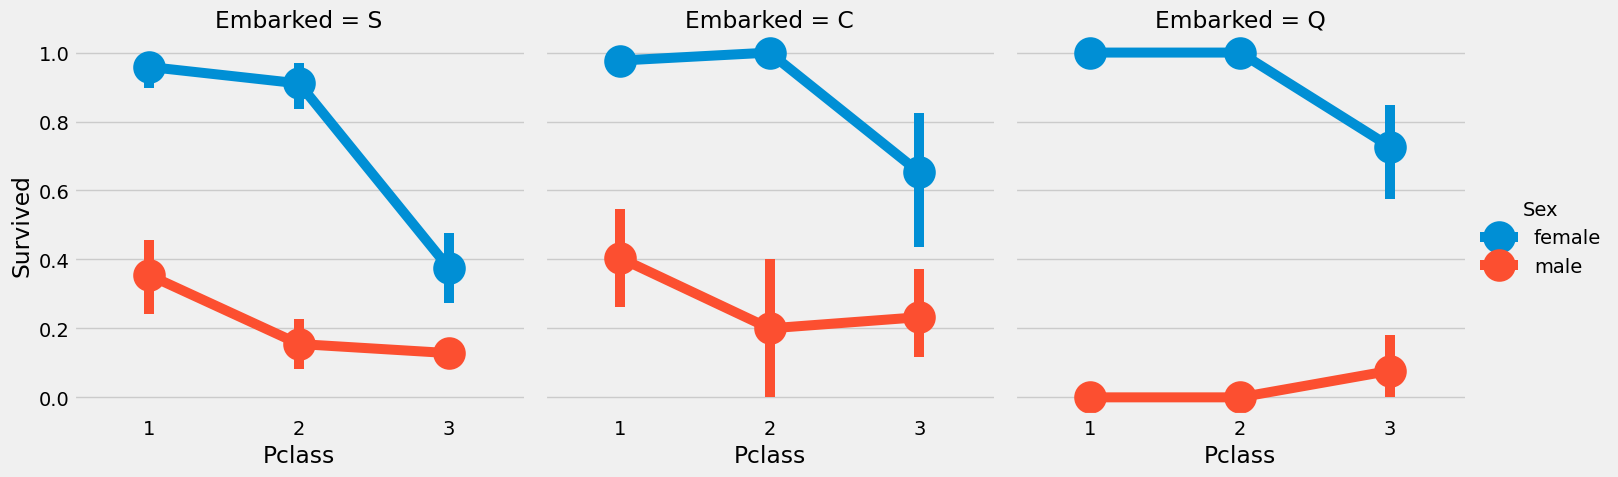

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=df, kind='point')

In [ ]:
df['Embarked'].isnull().sum()

2

In [ ]:
df['Embarked'].fillna('S',inplace=True)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
Other          891
dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN


In [ ]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
pd.crosstab(df['SibSp'], df['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<Axes: xlabel='SibSp', ylabel='Survived'>

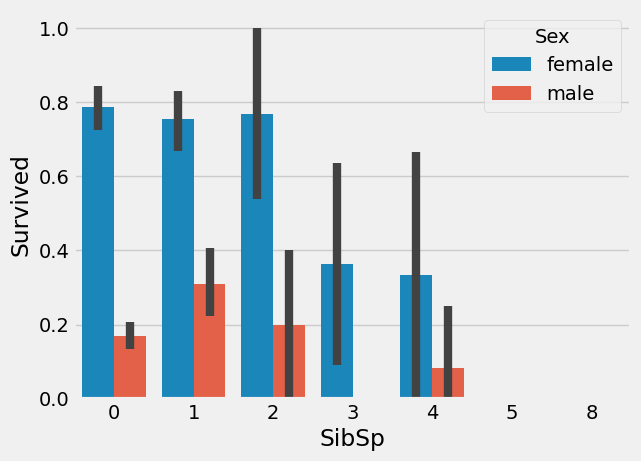

In [ ]:
sns.barplot(x='SibSp', y='Survived', data=df, hue='Sex')

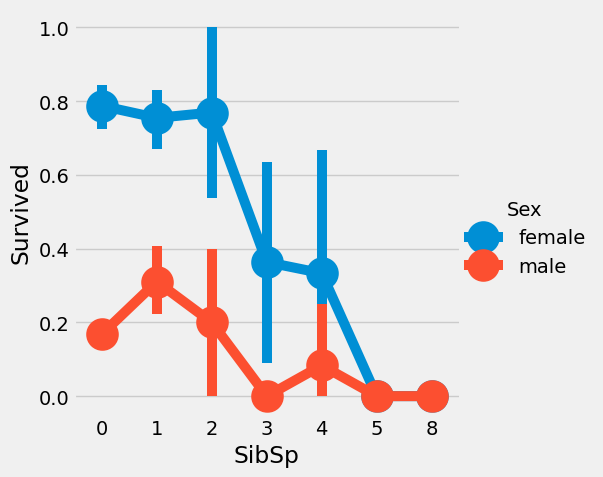

In [ ]:
sns.catplot(x='SibSp', y='Survived', data=df, kind='point', hue='Sex')

Fare - Continuous Data

In [ ]:
df['Fare'].max(),df['Fare'].min(),df['Fare'].mean(), df['Fare'].mode(),df['Fare'].median()

(512.3292,
 0.0,
 32.204207968574636,
 0    8.05
 Name: Fare, dtype: float64,
 14.4542)

<ipython-input-59-1eda241c3321>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Pclass']==1]['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

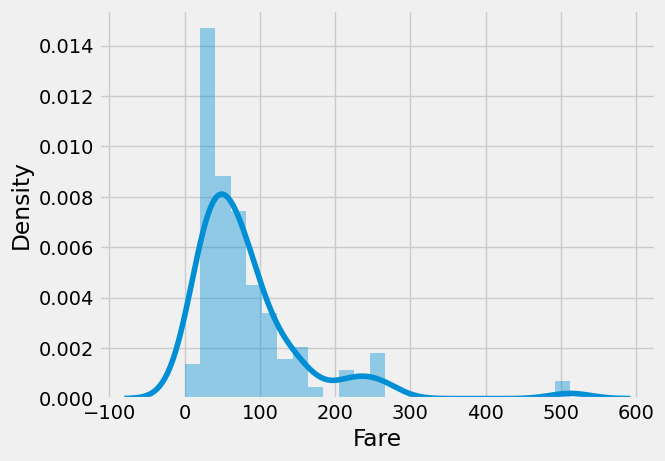

In [ ]:
sns.distplot(df[df['Pclass']==1]['Fare'])

<ipython-input-60-23b0b4607d15>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Pclass']==1]['Fare'],ax=ax[0])
<ipython-input-60-23b0b4607d15>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Pclass']==2]['Fare'],ax=ax[1])
<ipython-input-60-23b0b4607d15>:4: UserWarning: 

`distplo

Text(0.5, 1.0, 'Fares in Pclass 3')

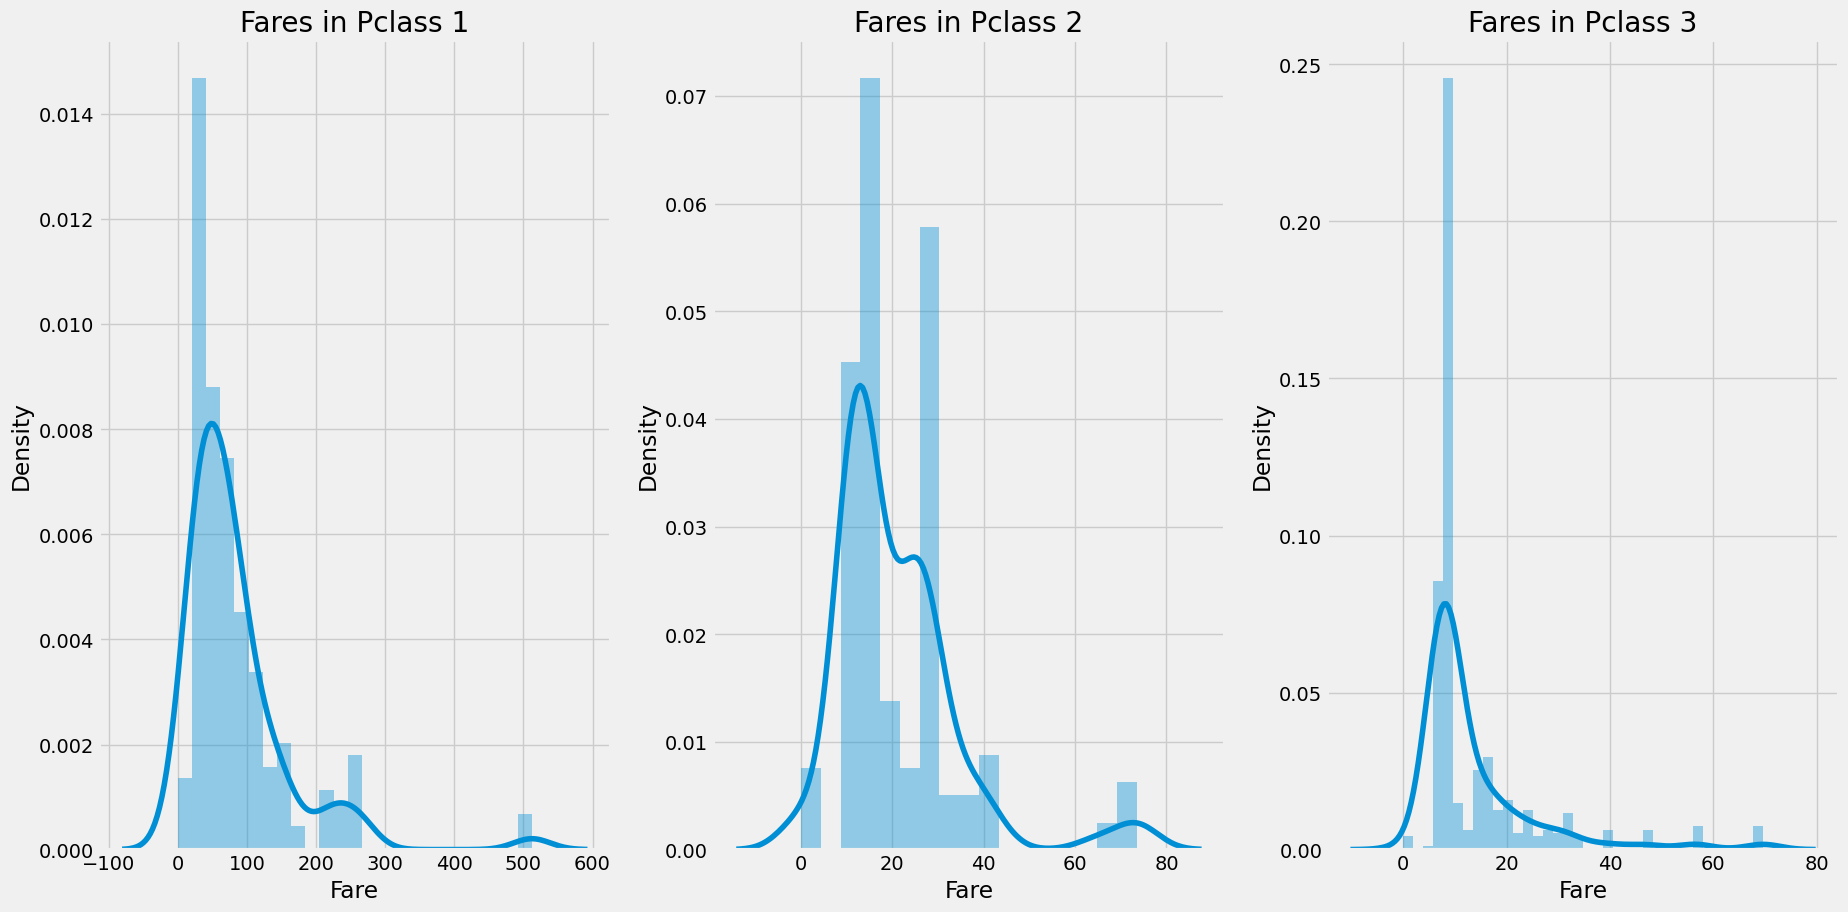

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,10))
sns.distplot(df[df['Pclass']==1]['Fare'],ax=ax[0])
sns.distplot(df[df['Pclass']==2]['Fare'],ax=ax[1])
sns.distplot(df[df['Pclass']==3]['Fare'],ax=ax[2])
ax[0].set_title("Fares in Pclass 1")
ax[1].set_title("Fares in Pclass 2")
ax[2].set_title("Fares in Pclass 3")

In [ ]:
# # Sex : Women has more survival chance than men
# Pclass Survival : Class 1 > class 2 > class 3
# Age : children with age 5 to 10 , 15 to 35 - died
# Embarked : C port has higher survival rate

Correlation

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x1000 with 0 Axes>

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,NaN


In [ ]:
df.drop(columns='Other', inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [ ]:
df['Age_cat'] = 0
df.loc[df['Age']<=16,'Age_cat'] = 0
df.loc[(df['Age']>16)&(df['Age']<=32),'Age_cat'] = 1
df.loc[(df['Age']>32)&(df['Age']<=50),'Age_cat'] = 2
df.loc[(df['Age']>50)&(df['Age']<=70),'Age_cat'] = 3
df.loc[df['Age']>70,'Age_cat'] = 4
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [ ]:
df['Age_cat'].value_counts()

Age_cat
1    382
2    341
0    104
3     59
4      5
Name: count, dtype: int64

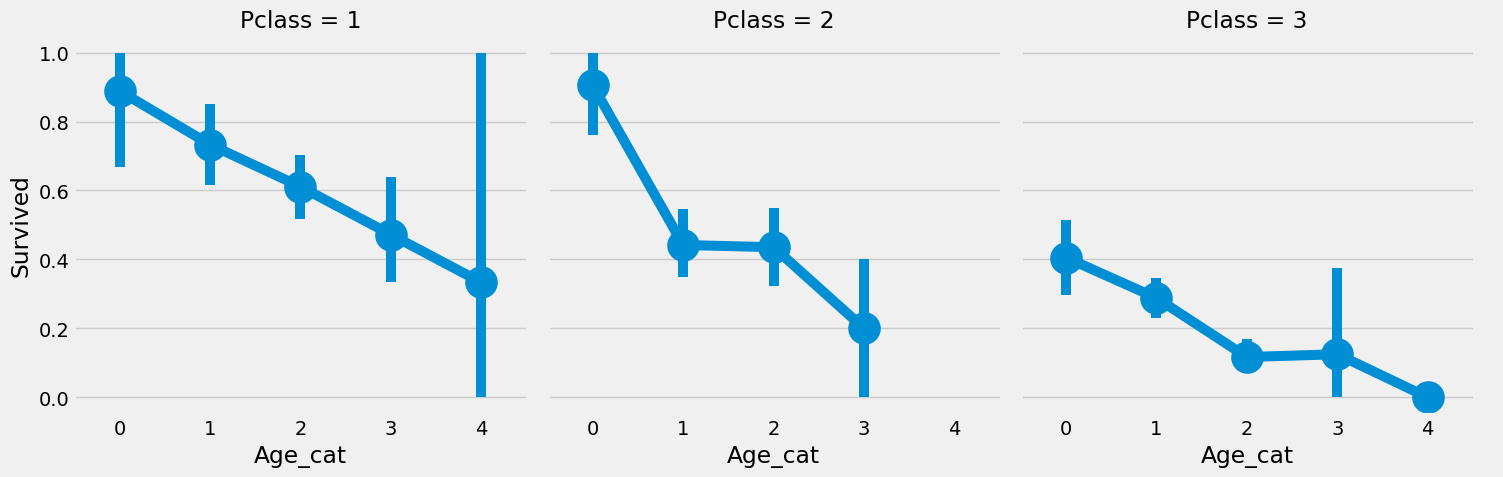

In [ ]:
sns.catplot(x='Age_cat', y='Survived', data=df, col = 'Pclass', kind='point')